Data Preprocessing

In [154]:
import pandas as pd 

df = pd.read_csv('.\imago\MLE-Assignment.csv')
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [155]:
df.shape

(500, 450)

In [156]:
df.isnull().values.any()

False

In [157]:
df.iloc[:, 1:].mean()

0                   0.443118
1                   0.440761
2                   0.433814
3                   0.426122
4                   0.418990
                    ...     
444                 0.738738
445                 0.738298
446                 0.737599
447                 0.738099
vomitoxin_ppb    3410.006000
Length: 449, dtype: float64

In [158]:
target = df['vomitoxin_ppb']
target

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64

In [159]:
# Get the range (max - min)
target_range = target.max() - target.min()

# Print min, max, and range
print("Min Value:", target.min())
print("Max Value:", target.max())
print("Range:", target_range)


Min Value: 0.0
Max Value: 131000.0
Range: 131000.0


Outlier detection and removal

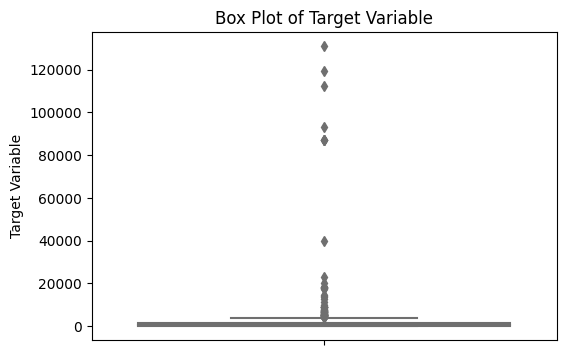

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the target variable
plt.figure(figsize=(6, 4))
sns.boxplot(y=target, color='skyblue')

# Add labels and title
plt.ylabel('Target Variable')
plt.title('Box Plot of Target Variable')

# Show plot
plt.show()


c:\Users\sarth\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarth\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarth\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


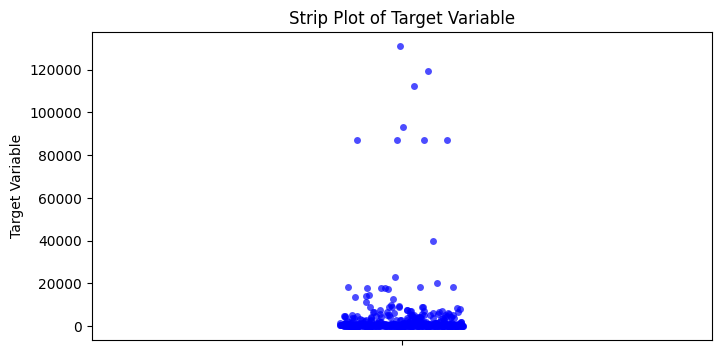

In [161]:

plt.figure(figsize=(8, 4))
sns.stripplot(y=target, color='blue', jitter=True, alpha=0.7)

plt.ylabel('Target Variable')
plt.title('Strip Plot of Target Variable')
plt.show()


In [288]:
from scipy.stats import zscore
import numpy as np 

df1 = df[np.abs(zscore(df['vomitoxin_ppb'])) < 3]
df1.shape

(492, 450)

In [289]:
Q1 = df['vomitoxin_ppb'].quantile(0.25)
Q3 = df['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1
df1 = df[(df['vomitoxin_ppb'] >= Q1 - 1.5 * IQR) & (df['vomitoxin_ppb'] <= Q3 + 1.5 * IQR)]
df1.shape

(420, 450)

In [329]:
df1 = df[~(df['vomitoxin_ppb'] > 1000)]
df1.shape

(331, 450)

c:\Users\sarth\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarth\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarth\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


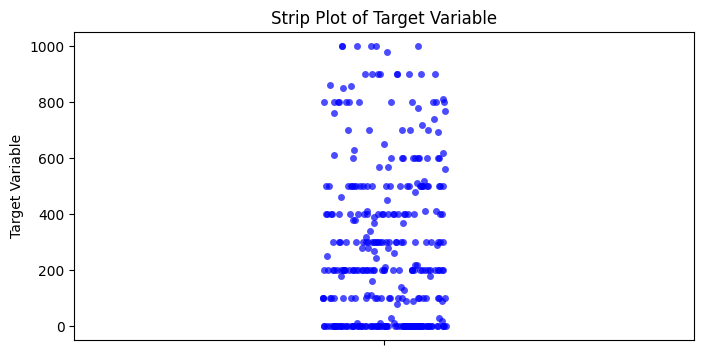

In [330]:

plt.figure(figsize=(8, 4))
sns.stripplot(y=df1['vomitoxin_ppb'], color='blue', jitter=True, alpha=0.7)

plt.ylabel('Target Variable')
plt.title('Strip Plot of Target Variable')
plt.show()


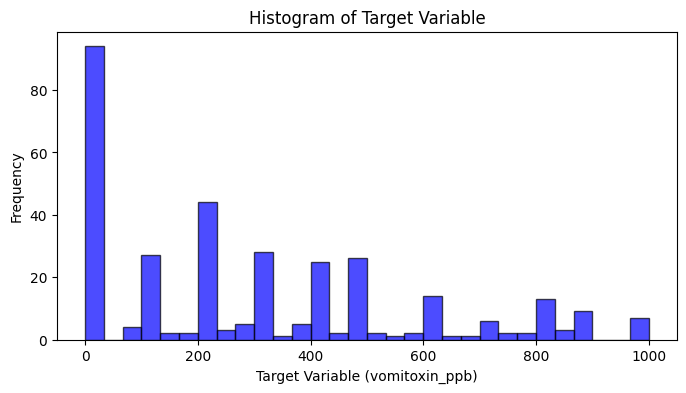

In [331]:

# Set figure size
plt.figure(figsize=(8, 4))

# Plot histogram of the target variable
plt.hist(df1['vomitoxin_ppb'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Labels and title
plt.xlabel('Target Variable (vomitoxin_ppb)')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')

# Show plot
plt.show()


Applying log transformation to target variable to keep the range suitable for model

In [354]:
import numpy as np

df1['vomitoxin_log'] = np.log1p(df1['vomitoxin_ppb'])  # log(1 + x) to avoid log(0)
df1.head()


C:\Users\sarth\AppData\Local\Temp\ipykernel_69992\3498039058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vomitoxin_log'] = np.log1p(df1['vomitoxin_ppb'])  # log(1 + x) to avoid log(0)


,hsi_id,0,1,2,3,4,5,6,7,8,...,441,442,443,444,445,446,447,vomitoxin_ppb,vomitoxin_scaled,vomitoxin_log
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0,1.00,6.908755
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0,0.22,5.398163
7,imagoai_corn_7,0.386569,0.408519,0.394123,0.394363,0.390526,0.379103,0.383645,0.370810,0.361250,...,0.786323,0.794155,0.784517,0.798741,0.800099,0.810282,0.770466,500.0,0.50,6.216606
8,imagoai_corn_8,0.439140,0.432694,0.423883,0.421475,0.411783,0.407528,0.385764,0.389579,0.367873,...,0.718282,0.707036,0.712581,0.720497,0.701015,0.704241,0.731010,100.0,0.10,4.615121
10,imagoai_corn_10,0.463650,0.465623,0.445566,0.411191,0.428212,0.449270,0.418872,0.423685,0.396482,...,0.751711,0.756844,0.760561,0.750717,0.746716,0.749224,0.750414,0.0,0.00,0.000000


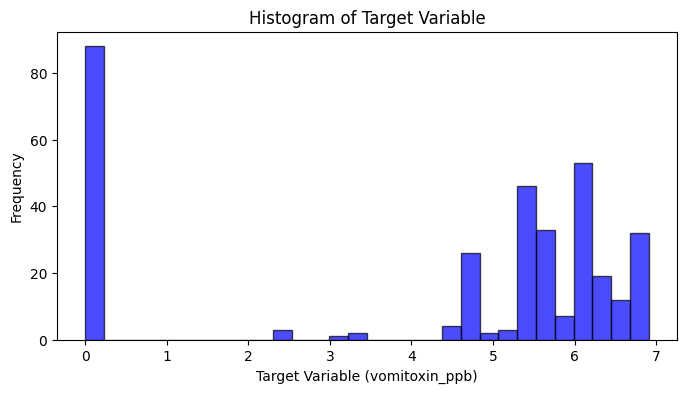

In [355]:

# Set figure size
plt.figure(figsize=(8, 4))

# Plot histogram of the target variable
plt.hist(df1['vomitoxin_log'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Labels and title
plt.xlabel('Target Variable (vomitoxin_ppb)')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')

# Show plot
plt.show()


Correlation between the input and target variable

In [356]:
# Compute correlation of all features with the target variable
correlation_matrix = df1.iloc[:,1:].corr()

# Print correlation of input features with the target
print(correlation_matrix.iloc[:, -1])  # Last column is the target


0                  -0.140437
1                  -0.145523
2                  -0.151152
3                  -0.139123
4                  -0.155835
                      ...   
446                -0.043304
447                -0.050515
vomitoxin_ppb       0.790533
vomitoxin_scaled    0.790533
vomitoxin_log       1.000000
Name: vomitoxin_log, Length: 451, dtype: float64


In [358]:
# Compute correlation matrix
correlation_matrix = df1.iloc[:, 1:-3].corr()

# Get correlation values with the target variable (last column)
target_correlation = correlation_matrix.iloc[:, -1]

# Take absolute values and sort in descending order
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

# Select top N most important features (excluding target itself)
top_n = 100  # Change this based on how many features you want
important_features = sorted_correlation.iloc[1:top_n+1]  # Exclude target itself

# Print the most important features
print("Top Features Correlated with Target:\n", important_features)


Top Features Correlated with Target:
 443    0.973464
419    0.973288
409    0.973103
431    0.972715
444    0.972710
         ...   
374    0.963983
393    0.963954
343    0.963939
293    0.963850
351    0.963817
Name: 447, Length: 100, dtype: float64


In [385]:
# Extract feature names
important_feature_list = important_features.index.tolist()

# Print the list
print("List of Important Features:\n", important_feature_list)


List of Important Features:
 [0, 4, 1, 2, 5, 3, 6, 7, 9, 10, 11, 8, 12, 13, 14, 17, 16, 15, 18, 19, 20, 22, 23, 24, 85, 84, 25, 87, 81, 88, 76, 80, 82, 21, 26, 89, 79, 77, 91, 83, 74, 78, 94, 86, 75, 90, 27, 71, 68, 92, 93, 60, 56, 29, 72, 28, 70, 63, 97, 95, 69, 62, 96, 73, 58, 55, 42, 67, 43, 54, 30, 44, 98, 61, 66, 65, 41, 38, 31, 45, 64, 49, 57, 40, 99, 53, 47, 39, 48, 59, 46, 100, 32, 101, 52, 50, 51, 102, 33, 103, 104, 36, 35, 37, 34, 107, 105, 106, 108, 112, 110, 115, 118, 114, 120, 111, 109, 123, 121, 130, 126, 117, 122, 137, 133, 129, 113, 325, 161, 312, 127, 128, 124, 116, 135, 306, 354, 146, 336, 330, 125, 337, 132, 352, 140, 340, 301, 319, 327, 119, 300, 321, 335, 328, 283, 342, 323, 357, 307, 317, 138, 331, 160, 142, 318, 148, 136, 346, 344, 322, 139, 288, 332, 350, 294, 145, 147, 311, 163, 309, 355, 303, 358, 334, 316, 134, 351, 326, 343, 141, 315, 348, 308, 149, 131, 349, 299, 302, 273, 320, 365, 360, 345, 366, 162, 150, 353, 282, 373, 167, 367, 304, 356, 290, 154, 261, 

PCA for selecting most important feature

In [361]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset (assuming df has spectral features and 'DON_concentration' as the target)
X = df1.iloc[:, 1:-3]  # Drop target variable
y = df1['vomitoxin_log']

# Standardize the spectral features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Get PCA loadings (importance of each feature in principal components)
loadings = np.abs(pca.components_).sum(axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})

# Sort features by importance (highest loading values)
important_features = feature_importance.sort_values(by='Loading', ascending=False)

# Select top N most important features (e.g., top 10)
top_features = important_features['Feature'].head(50).tolist()

print("Top 10 Most Important Spectral Features for DON Detection:")
print(top_features)


Top 10 Most Important Spectral Features for DON Detection:
['0', '4', '1', '2', '5', '3', '6', '7', '9', '10', '11', '8', '12', '13', '14', '17', '16', '15', '18', '19', '20', '22', '23', '24', '85', '84', '25', '87', '81', '88', '76', '80', '82', '21', '26', '89', '79', '77', '91', '83', '74', '78', '94', '86', '75', '90', '27', '71', '68', '92']


In [362]:
X_data = df1.iloc[:, 1:-3]
y_data = df1.iloc[:, -1]

Scaling and Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame
scaler = StandardScaler()
X_data1 = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns, index=X_data.index)

# Print first 5 rows
print(X_data1.head())


In [364]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Initialize Normalizer (L2 norm by default)
scaler = Normalizer()

# Apply normalization
X_data1 = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns, index=X_data.index)

# Print first 5 rows
print(X_data1.head())


           0         1         2         3         4         5         6  \
1   0.030212  0.029279  0.029251  0.028775  0.028860  0.028311  0.027297   
4   0.031330  0.031584  0.030410  0.031608  0.030077  0.029243  0.029701   
7   0.024518  0.025910  0.024997  0.025012  0.024769  0.024044  0.024332   
8   0.031059  0.030603  0.029980  0.029810  0.029124  0.028823  0.027284   
10  0.030778  0.030909  0.029577  0.027295  0.028425  0.029823  0.027805   

           7         8         9  ...       438       439       440       441  \
1   0.026426  0.027167  0.026134  ...  0.050979  0.049701  0.050664  0.051008   
4   0.028571  0.027625  0.027903  ...  0.050506  0.049924  0.050105  0.049354   
7   0.023518  0.022912  0.024537  ...  0.050837  0.051950  0.051200  0.049872   
8   0.027554  0.026018  0.026991  ...  0.049811  0.049950  0.049904  0.050802   
10  0.028125  0.026319  0.026208  ...  0.050586  0.050234  0.049473  0.049900   

         442       443       444       445       446    

In [365]:
X_data[:5]

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
7,0.386569,0.408519,0.394123,0.394363,0.390526,0.379103,0.383645,0.370810,0.361250,0.386870,...,0.801537,0.819083,0.807260,0.786323,0.794155,0.784517,0.798741,0.800099,0.810282,0.770466
8,0.439140,0.432694,0.423883,0.421475,0.411783,0.407528,0.385764,0.389579,0.367873,0.381620,...,0.704273,0.706239,0.705595,0.718282,0.707036,0.712581,0.720497,0.701015,0.704241,0.731010
10,0.463650,0.465623,0.445566,0.411191,0.428212,0.449270,0.418872,0.423685,0.396482,0.394814,...,0.762055,0.756740,0.745287,0.751711,0.756844,0.760561,0.750717,0.746716,0.749224,0.750414


In [366]:
y_data[:5]

1     6.908755
4     5.398163
7     6.216606
8     4.615121
10    0.000000
Name: vomitoxin_log, dtype: float64

RF model testing

In [367]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(264, 448)
(67, 448)


In [315]:
X_train[:10]

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
75,-0.513880,-0.908894,-0.758809,-0.421203,-0.282699,-0.687391,-0.626923,-0.745298,-0.861232,-0.948488,...,-1.161154,-0.873717,-0.881288,-0.894267,-1.359887,-0.759305,-0.870142,-0.693128,-1.008526,-0.865533
155,0.365820,1.390581,1.041742,0.732893,1.102179,0.911357,0.579457,1.134296,0.589180,0.627866,...,0.525355,0.448492,0.260671,0.597170,1.010350,0.822803,0.594589,0.679512,0.504886,0.399439
33,0.583674,0.461198,0.237946,0.479402,0.410973,0.207443,0.203894,0.130141,-0.065054,0.081421,...,0.692179,0.196025,0.369417,0.252003,0.041113,0.371113,0.237383,-0.119121,0.064447,0.203736
97,-0.418064,-0.122359,-0.179085,-0.457544,-0.714985,-1.087510,-0.306525,-0.599774,-0.410521,-0.946965,...,-0.732213,-1.115184,-1.137634,-0.456237,-0.902480,-0.851820,-1.138311,-0.688765,-0.776854,-0.910855
348,-2.437420,-2.097060,-1.858098,-2.064169,-1.781577,-1.915934,-1.358103,-2.097578,-2.241467,-1.828404,...,-2.387551,-2.060710,-2.086946,-2.501548,-2.180317,-2.270926,-1.893923,-2.328411,-2.167791,-2.160801
446,-1.335799,-1.263370,-1.122163,-1.037468,-0.892160,-0.858562,-1.074401,-0.861374,-1.013657,-0.885919,...,-1.220127,-1.036588,-1.195929,-1.235013,-1.120240,-1.394465,-1.156229,-0.818242,-0.997879,-1.078527
401,-0.182096,-0.383521,-0.376501,-0.675402,-0.533517,-0.817360,-0.243008,-0.675099,-0.351213,-1.146078,...,-0.707462,-0.749907,-0.683020,-0.685711,-0.666985,-0.700258,-0.931422,-0.836068,-0.710652,-0.475780
184,-0.386358,-0.506795,-0.910886,-0.523801,-0.558043,-0.881109,-1.409364,-0.935732,-0.825697,-0.647543,...,-0.780869,-0.845857,-1.043425,-0.745701,-1.116388,-0.846167,-0.962764,-0.945429,-0.902365,-1.074514
294,-0.659370,-0.813497,-0.115974,-0.149661,-0.330983,-0.380252,-0.495662,-0.146445,-0.733284,-0.590958,...,-0.445281,-0.474448,-0.564160,-0.864373,-0.719955,-0.511935,-0.667504,-0.580529,-0.366968,-0.307773
249,0.626747,0.849625,0.641115,1.014049,0.932287,0.662494,0.935405,1.056278,0.737229,0.867175,...,0.553142,0.504446,0.528082,0.271597,0.314108,0.717482,0.453542,0.835062,0.613313,0.716646


In [316]:
y_train[:10]

75     0.250
155    0.375
33     0.000
97     0.775
348    0.525
446    0.100
401    0.200
184    0.075
294    0.150
249    0.100
Name: vomitoxin_scaled, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# X_train = X_train[top_features]
# X_test = X_test[top_features]

# X_train = X_train[important_features.index]
# X_test = X_test[important_features.index]


model = RandomForestRegressor(n_estimators=100, criterion = 'absolute_error')
rf = model.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")



KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


Using SHAP for model interpretability

C:\Users\sarth\AppData\Local\Temp\ipykernel_69992\1559784215.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train)


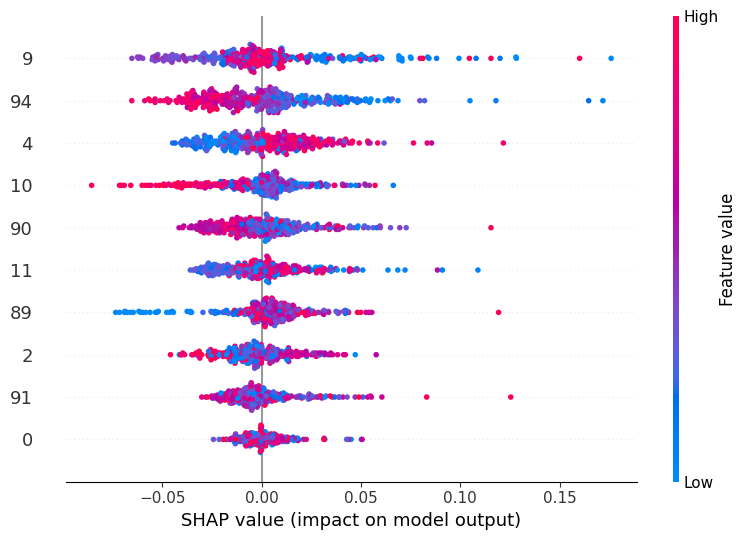

In [312]:
import shap

# Train Random Forest model
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)


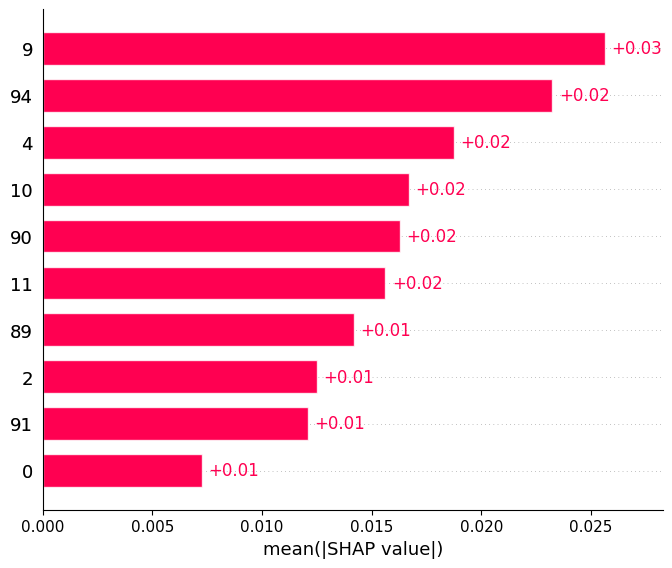

In [313]:
shap.plots.bar(shap_values)

In [179]:
import numpy as np

# Compute mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame of feature importance
shap_importance_df = pd.DataFrame({"Feature": X_train.columns, "SHAP_Value": shap_importance})

# Sort features by SHAP value (descending)
shap_importance_df = shap_importance_df.sort_values(by="SHAP_Value", ascending=False)

# Select the top N features (e.g., top 50)
top_n = 10  # Change this based on your need
top_features = shap_importance_df.head(top_n)["Feature"].tolist()

# Keep only the top features in the dataset
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(f"Selected Top {top_n} Features:\n", top_features)


Selected Top 10 Features:
 ['371', '249', '320', '170', '424', '218', '59', '234', '156', '193']


Final model neural network

In [394]:
import torch
import torch.nn as nn

# Define a deeper feedforward neural network
class PredictionModel(nn.Module):
    def __init__(self, input_size):
        super(PredictionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),  # First hidden layer with 128 neurons
            nn.ReLU(),  # Activation function
            nn.Linear(128, 64),  # Second hidden layer with 64 neurons
            nn.ReLU(),
            nn.Linear(64, 32),  # Third hidden layer with 32 neurons
            nn.ReLU(),
            nn.Linear(32, 1)  # Output layer for regression
        )
    
    def forward(self, x):
        return self.model(x)

# Get input size from DataFrame (excluding target column)
input_size = X_data.shape[1]  # Assuming last column is the target
# input_size = 50  # Assuming last column is the target
print(f"Input size: {input_size}")

# Initialize the model
model = PredictionModel(input_size)

# Print model architecture
print(model)


Input size: 448
PredictionModel(
  (model): Sequential(
    (0): Linear(in_features=448, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [396]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Convert DataFrame to NumPy arrays
# X = df.iloc[:, :-1].values  # Features
# y = df.iloc[:, -1].values.reshape(-1, 1)  # Target reshaped

# # Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_data1, y_data, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)

X_train_torch = X_train.values
y_train_torch = y_train.values.reshape(-1,1)
X_test_torch = X_test.values
y_test_torch = y_test.values.reshape(-1,1)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_torch, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_torch, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_torch, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_torch, dtype=torch.float32)

# print(X_train_tensor)
# print(y_train_tensor)

model = model

# Define loss function and optimizer
criterion = nn.L1Loss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Train the model
epochs = 100000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Reset gradients
    predictions = model(X_train_tensor)  # Forward pass
    loss = criterion(predictions, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    
    if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

(264, 448)
(264,)
Epoch 10/100000, Loss: 4.1155
Epoch 20/100000, Loss: 3.9663
Epoch 30/100000, Loss: 3.5928
Epoch 40/100000, Loss: 2.6962
Epoch 50/100000, Loss: 2.2945
Epoch 60/100000, Loss: 2.1378
Epoch 70/100000, Loss: 2.0562
Epoch 80/100000, Loss: 2.0391
Epoch 90/100000, Loss: 2.0483
Epoch 100/100000, Loss: 2.0441
Epoch 110/100000, Loss: 2.0390
Epoch 120/100000, Loss: 2.0392
Epoch 130/100000, Loss: 2.0392
Epoch 140/100000, Loss: 2.0389
Epoch 150/100000, Loss: 2.0389
Epoch 160/100000, Loss: 2.0388
Epoch 170/100000, Loss: 2.0388
Epoch 180/100000, Loss: 2.0387
Epoch 190/100000, Loss: 2.0387
Epoch 200/100000, Loss: 2.0386
Epoch 210/100000, Loss: 2.0386
Epoch 220/100000, Loss: 2.0385
Epoch 230/100000, Loss: 2.0385
Epoch 240/100000, Loss: 2.0384
Epoch 250/100000, Loss: 2.0383
Epoch 260/100000, Loss: 2.0383
Epoch 270/100000, Loss: 2.0382
Epoch 280/100000, Loss: 2.0382
Epoch 290/100000, Loss: 2.0381
Epoch 300/100000, Loss: 2.0381
Epoch 310/100000, Loss: 2.0380
Epoch 320/100000, Loss: 2.0379

In [399]:
torch.save(model, "full_model.pth")

Mean Absolute Error (MAE): 1.9630
Mean Squared Error (MSE): 6.9279
Root Mean Squared Error (RMSE): 2.6321
R² Score: -0.2305


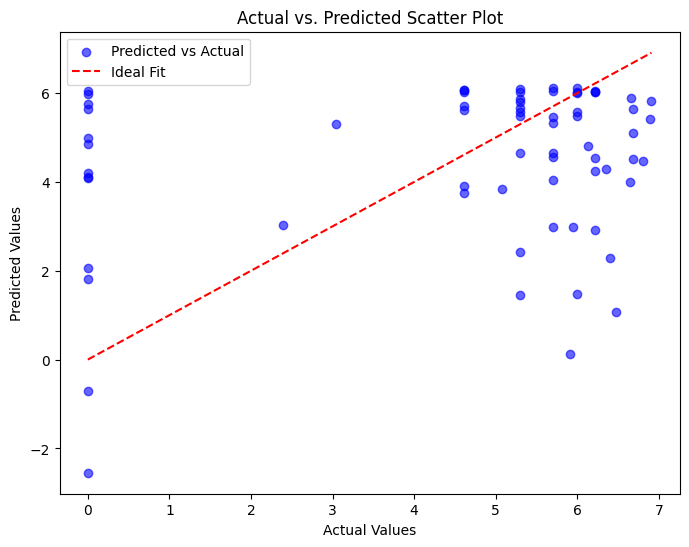

In [400]:
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

model = torch.load("full_model.pth")
# Set model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)  # Get predictions
    y_pred = y_pred_tensor.cpu().numpy().flatten()  # Convert to NumPy and flatten if necessary
    y_test = y_test_tensor.cpu().numpy().flatten()  # Ensure y_test is also NumPy

# Compute regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")  # Perfect match line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Scatter Plot")
plt.legend()
plt.show()


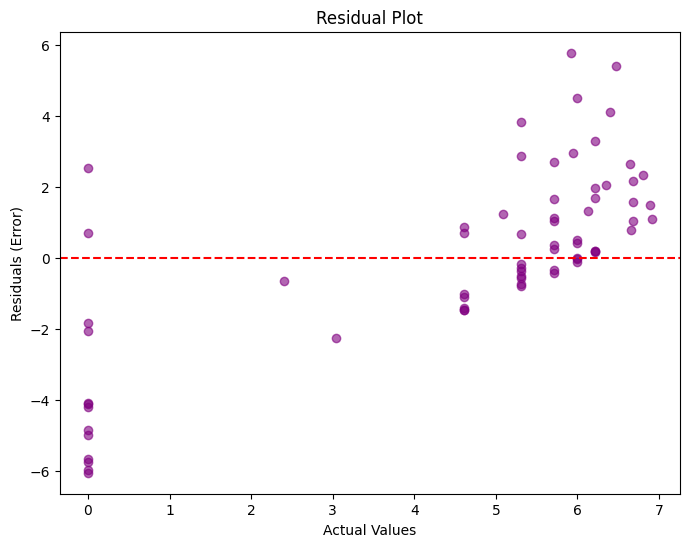

In [398]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()
